# ST115: Managing and Visualising data

## Lecture 9: Visualising high(er) dimension data

### 2022/23 Lent Term

## So far...

* Managing data:
    * Data collection (week 8)
    * Database (week 5)
    * Manipulating structured data with the use of NumPy and Pandas (week 2 and 3)
    * Manipulating semi-structured and unstructured data (week 7)
* Visualising data 
    * Visualisation for EDA (week 4)

## More on data visualisation

* Visualising high(er) dimensional data (this week!)
* Visualising graph/network data (next week)
* Visualising data for explanatory purpose (last weeks)

## Scatter plot revisit

We can use a 2D scatter plot to visualise the relations between 2 attributes, or to discover clusters / groups 
* Example:

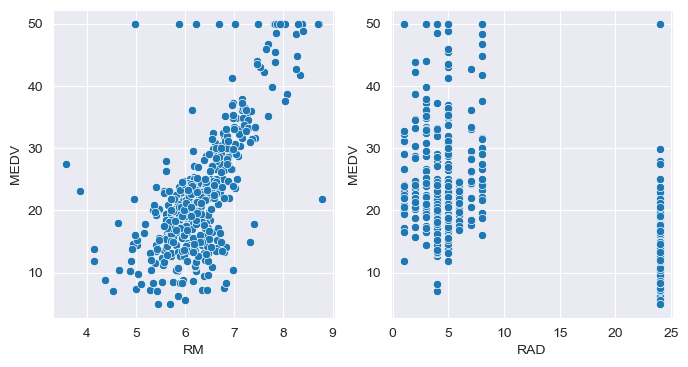

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')
housing = pd.read_csv('data/housing.csv', index_col = 0)
fig, ax = plt.subplots(1,2, figsize = (8,4))
sns.scatterplot(data = housing, x = 'RM', y = 'MEDV', ax = ax[0]);
sns.scatterplot(data = housing, x = 'RAD', y = 'MEDV', ax = ax[1]);

## Scatter plot revisit (continue)

If we want to see the relations between more than 2 attributes, we can still use 2D scatter plot, but with the use of colour, shape, style or other properties of markers. 
* Example:

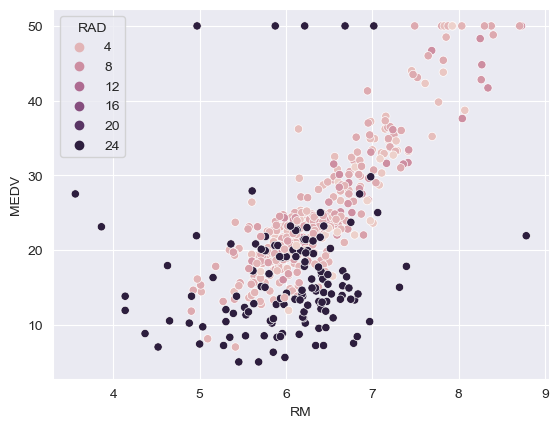

In [130]:
sns.scatterplot(data = housing, hue = 'RAD', y = 'MEDV', x = 'RM');

* For this example, the scatterplot helps us to see different relations between `RM` and `MEDV` based on different values of `RAD`
* Often scatter plots with more than 2 attributes can be difficult to read
* Not able to use this way to visual data with more than 6 attributes

## Scatter plot revisit (continue)

To explore the relations for all attributes, we can plot all possible 2D scatter plots. 

<center><img src="figs/pairplot.png" width="500"/></center>

Note this will only allow us to visualise the _pairwise_ relations.

## Motivative example: Breast cancer

Breast cancer wisconsin dataset from `sklearn.datasets` containing $n=569$ observations with $p=30$ attributes:

In [131]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
cancer_data_df = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'], 
                              index = cancer_data['target'])
cancer_data_df.index.name = 'type' # 0 for malignant, 1 for benign
cancer_data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
type,,,,,,,,,,,,,,,,,,,,,
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


* How are we going to visualise the data to explore the relations between the attributes?

## Motivative example: Gene expressions

Dataset of Bacillus subtilis containing $n=71$ observations of $p=4088$ attributes (gene expressions):

In [132]:
riboflavin = pd.read_csv('data/riboflavin.csv')
riboflavin

,x.AADK_at,x.AAPA_at,x.ABFA_at,x.ABH_at,x.ABNA_at,x.ABRB_at,x.ACCA_at,x.ACCB_at,x.ACCC_at,x.ACDA_at,...,x.YYDF_i_at,x.YYDG_at,x.YYDH_at,x.YYDI_at,x.YYDJ_at,x.YYDK_at,x.YYXA_at,x.YYZB_at,x.YYZE_at,x.zur_at
0,8.492404,8.111451,8.320842,10.287112,8.261279,10.208273,9.745474,9.818821,9.676227,8.372443,...,7.882737,5.440163,4.981684,6.481998,5.363919,7.773494,7.668711,3.762119,7.172823,7.427105
1,7.639380,7.239965,7.289051,9.862287,7.303497,9.500023,9.216008,9.854946,9.650078,7.732604,...,7.912135,5.383739,4.597438,6.390127,4.763876,7.336261,7.600104,3.761616,7.187113,7.545287
2,8.088340,7.855510,7.793395,9.676720,7.098273,9.473917,9.580384,9.926077,9.787129,7.925034,...,7.354618,5.718795,4.468228,6.123498,5.400686,7.573388,7.873352,3.741953,7.251285,7.718321
3,7.886820,7.939513,7.997588,9.680562,7.408494,9.788725,9.447722,9.852773,9.546915,7.838269,...,7.691985,5.561048,4.787030,5.904708,5.139692,7.214269,7.384115,3.887179,7.117375,7.260654
4,6.805762,7.554522,7.609902,8.551953,7.712407,8.490847,8.696249,8.573272,8.589661,7.905928,...,7.999088,5.549914,5.258139,6.206778,4.910169,6.884474,6.996956,4.034177,7.722534,6.828164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,6.669958,7.731588,7.719349,8.267227,6.821443,8.482042,8.231037,8.428432,8.497505,8.118577,...,8.646136,5.318534,4.908785,6.081095,5.284497,6.802258,7.079083,4.492137,7.351626,6.903990
67,7.833311,8.136090,8.165093,9.562706,8.242625,9.749418,9.360730,8.974610,9.028068,8.274259,...,8.191385,4.991214,4.603681,5.887783,4.955115,6.531699,7.947857,3.954690,7.269928,7.439051
68,6.163461,7.714285,7.560790,7.476788,6.972776,7.148842,7.373864,7.654946,7.818791,8.139991,...,7.673101,5.492333,5.167516,6.089535,5.261065,6.925765,7.244050,4.421958,7.842281,6.892450
69,7.342565,7.743141,7.709288,9.307739,7.999415,9.762122,9.105318,8.988289,9.004700,8.256679,...,8.522762,5.407418,5.480406,6.552994,5.609084,7.148286,7.522179,4.986751,7.539126,7.309948


## Today's plan

* Visualising high(er)-dimensional data
    * Number of dimensions
    * Dimensionality reduction: PCA
* Regular expression


## Illustrative example: football player

Here we have the football player dataset:

In [133]:
import pandas as pd

df = pd.read_csv('data/player.csv')
df

,value (£m),age,height (m)
0,2.05,20,1.78
1,1.70,21,1.89
2,2.17,22,1.83
3,2.20,23,1.72
4,3.90,24,1.87


Here we have 5 observations (players) and 3 attributes (value, age and height).
* ... or a table with 5 rows and 3 columns

## Football player example (continue)

We can represent the same data in NumPy ndarray:

In [134]:
num = df.to_numpy()
num

array([[ 2.05, 20.  ,  1.78],
       [ 1.7 , 21.  ,  1.89],
       [ 2.17, 22.  ,  1.83],
       [ 2.2 , 23.  ,  1.72],
       [ 3.9 , 24.  ,  1.87]])

In [135]:
num.shape

(5, 3)

which is a $5\times 3$ matrix.
* ... or 5 vectors/points in a 3 dimensional space, and the dataset has $3$ dimensions

## Football player example: visualisation

Each observation as a point in the 3D space:

<IPython.core.display.Javascript object>


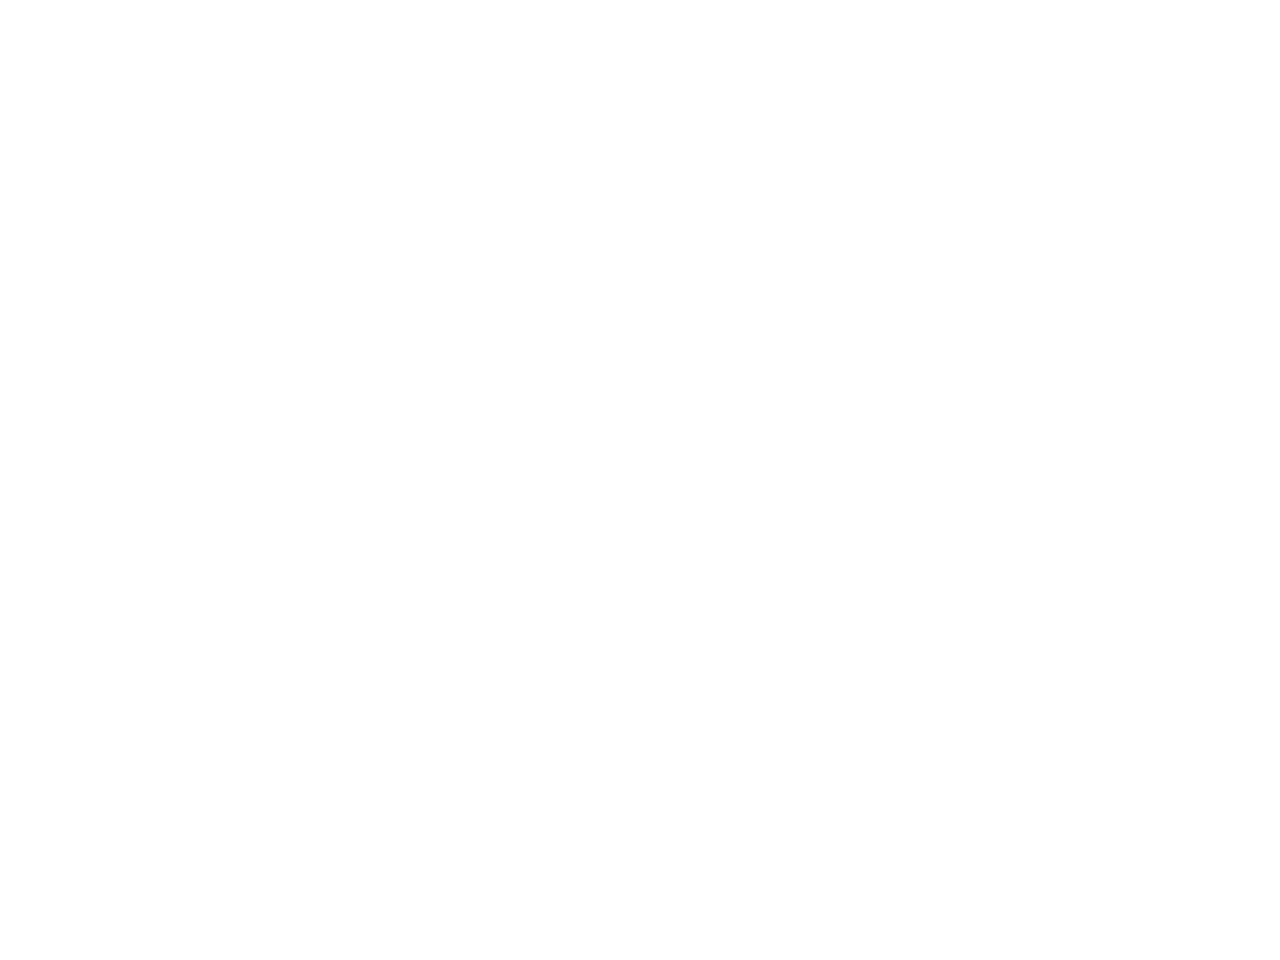

In [136]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure(); ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(df['value (£m)'], df['age'], df['height (m)']);
ax.set_xlabel('value (£m)');ax.set_ylabel('age');ax.set_zlabel('height (m)');

Like 2D scatter plot, the 3D scatter plot allows you to discover the relations between the attributes.
* However, 3D scatter plots are often difficult to read

## Dimensionality

For a dataset of $n$ observations with $p$ attributes, we can think of dataset as $n$ vectors in a $p$-dimensional space.
* We can also consider the dataset has $p$ dimensions, or the dataset is $p$-dimensional, or the dimensionality of the dataset is $p$

## Football player example (modified)

How about the following dataset, what is the number of dimensions of the data?

In [137]:
df_2 = pd.read_csv('data/player_2.csv')
df_2

,value (£m),age,height (m),height (cm)
0,2.05,20,1.78,178
1,1.70,21,1.89,189
2,2.17,22,1.83,183
3,2.20,23,1.72,172
4,3.90,24,1.87,187


While the table has 4 columns, the fourth column and the third column representing the same information!
* In linear algebra terms, the fourth column is the _linear combination_ of the third column

## Football player example (modified, continue)

* In linear algebra terms, the rank of the matrix is 3 instead of 4:

In [138]:
import numpy as np
np.linalg.matrix_rank(df_2.to_numpy())

3

Here the rank of the matrix is a better measure of the _intrinsic_ dimensionality of the data. 

Takeaway points:
* The "actual" or "intrinsic" number of dimensions of the data can be smaller than the number of attributes


## Illustrative example: Hello

Here we have a dataset with 3 attributes:

In [139]:
hello = pd.read_csv('data/hello.csv')
hello

,x,y,z
0,0,1,4.0
1,1,1,3.5
2,3,1,2.5
3,4,1,2.0
4,5,1,1.5
...,...,...,...
98,15,7,-6.5
99,18,7,-8.0
100,19,7,-8.5
101,20,7,-9.0


What is the intrinsic number of dimensions of the data?

## Hello example: visualisation

Let's visualise the data using 3D scatter plot:

<IPython.core.display.Javascript object>


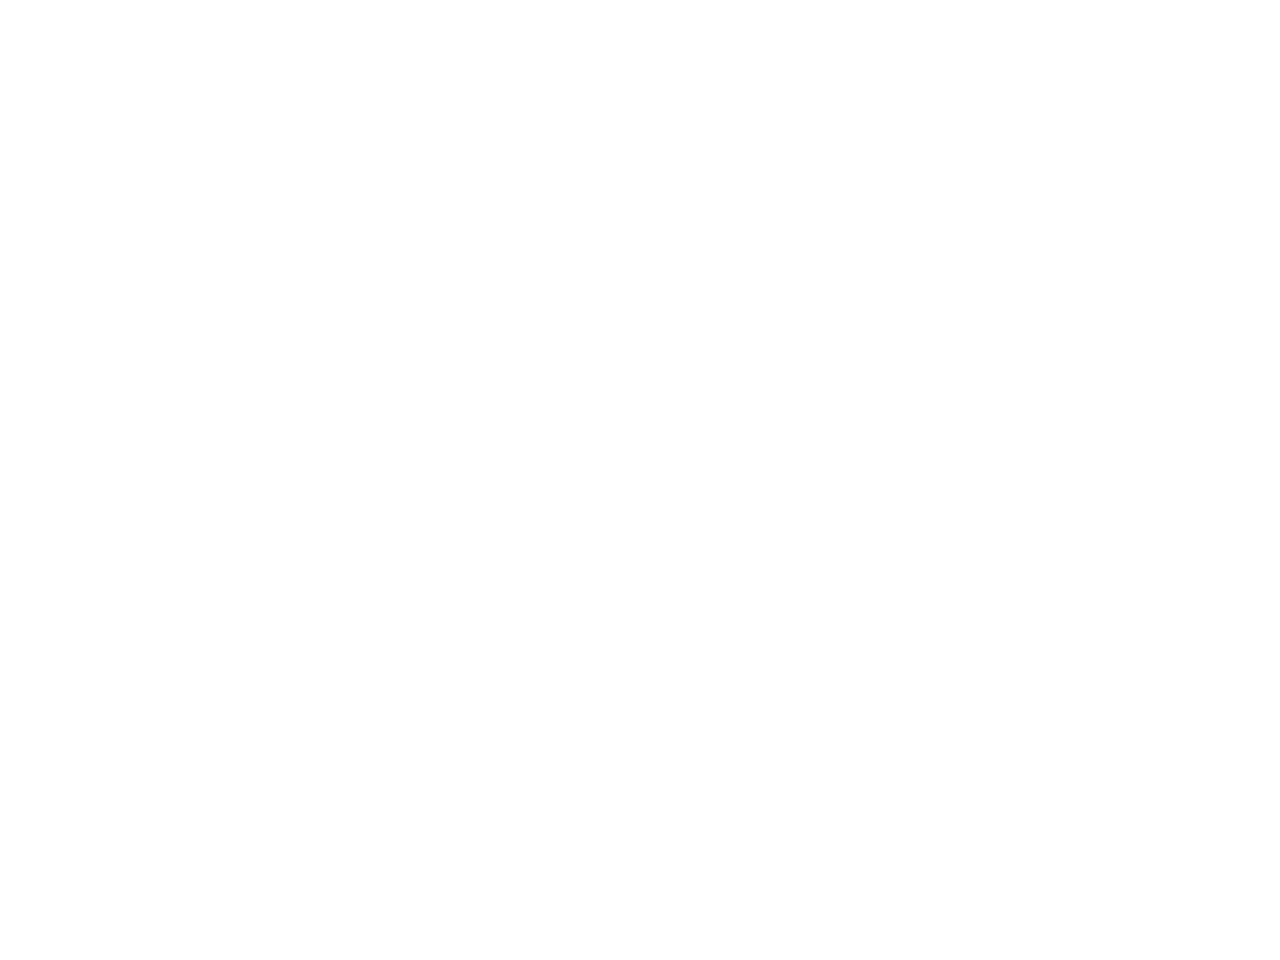

In [140]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(hello['x'], hello['y'], hello['z'])
ax.set_ylim3d([-10, 20]);

By rotating the axes, we can see the intrinsic dimension of the data is 2 instead of 3.
* All the data points are on a _hyperplane_ 

## Hello example: visualisation (continue)

As the intrinsic number of dimensions of the data is 2, if we _project_ / _map_ / _transform_ the data from 3d to 2d (appropriately), the visualisation is much clearer:

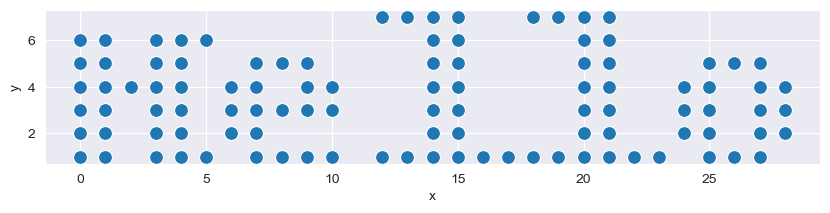

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 2))
sns.scatterplot(x = hello['x'], y = hello['y'], s = 100)
plt.show()

## Hello example (modified)

For this example, not all data points are on hyperplane:

<IPython.core.display.Javascript object>


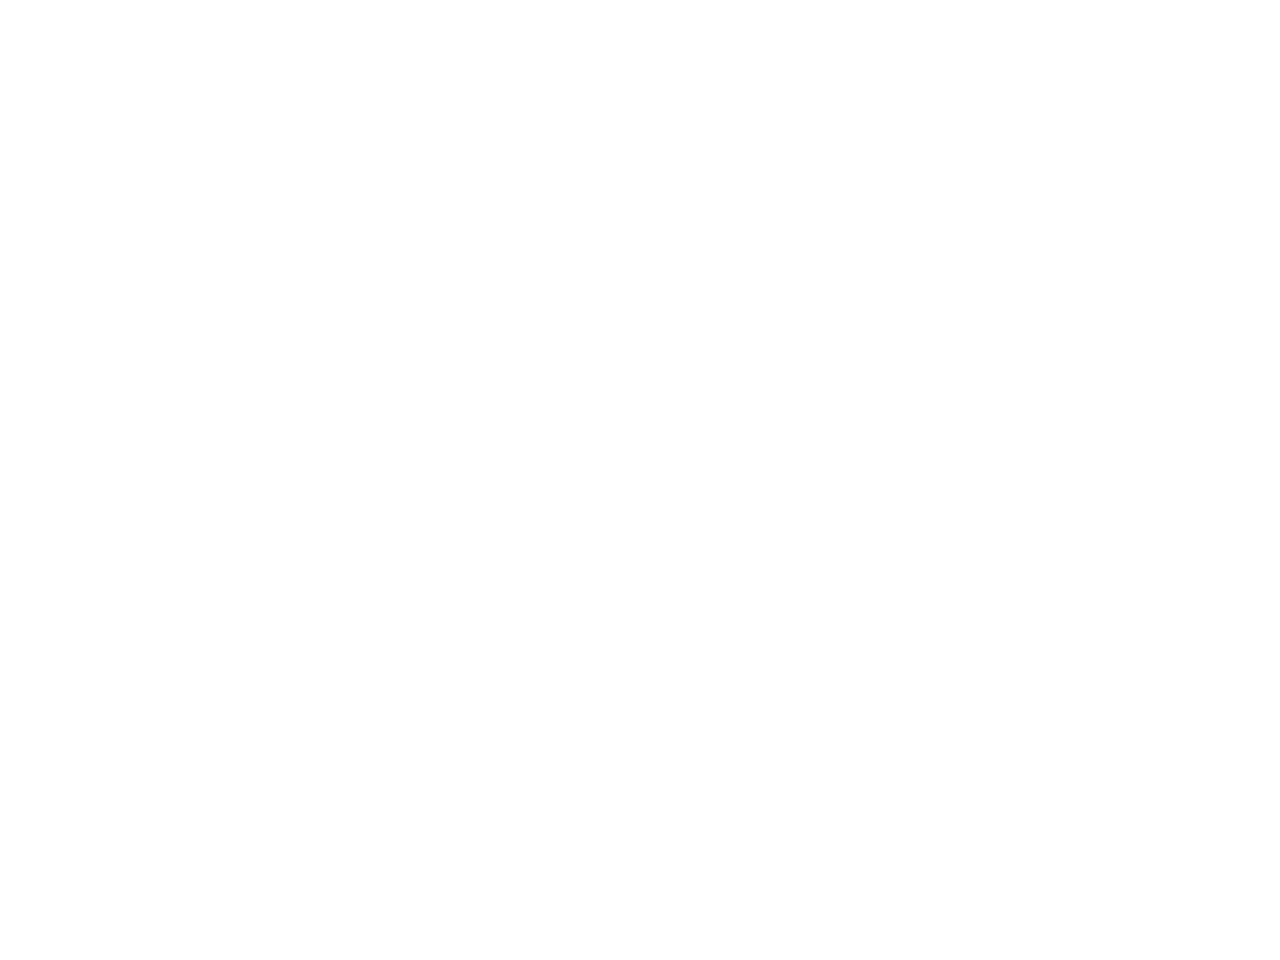

In [142]:
%matplotlib notebook
import matplotlib.pyplot as plt
hello_2 = pd.read_csv('data/hello_2.csv')
fig = plt.figure(); ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(hello_2['x'], hello_2['y'], hello_2['z'])
ax.set_ylim3d([-10, 20]);

If we reduce the data to 2-dimensional, we will lose _some_ information, but we can retain the important and meaningful properties of the data.

## Visualise data with higher dimensions

Idea: 
* Data may have some "good" lower dimensional representation. Examples:

<center><img src="figs/lower_dimension.png" width="600"/></center>

* If we can project the higher-dimensional data onto a 2-dimensional subspace then we can plot the data!

The process of projecting the high-dimensional data onto a lower dimensional subspace is called _dimensionality reduction_.

## Demo: Breast cancer data

We want to convert the data from higher dimensional: 

In [143]:
cancer_data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
type,,,,,,,,,,,,,,,,,,,,,
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


... to 2-dimensional using some dimensional reduction methods:

In [144]:
with open('data/cancer_pca.npy', 'rb') as f:
    transformed_cancer_data = np.load(f)
transformed_cancer_data.shape

(569, 2)

## Demo: Breast cancer data (continue)

With the data in 2-dimensional, we can then visualise the data with scatter plot:

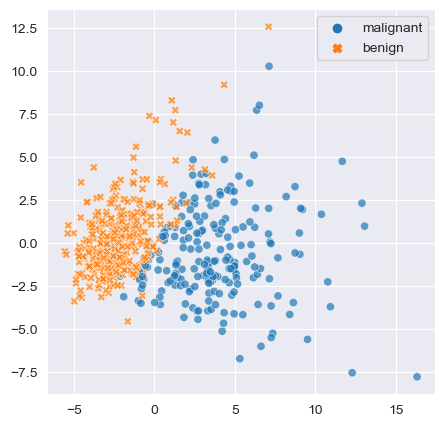

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=transformed_cancer_data[:,0], y=transformed_cancer_data[:,1], 
                hue=cancer_data_df.index, style=cancer_data_df.index, ax=ax, alpha=0.7)
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['malignant', 'benign']);

How to interpret the plot?

## Dimensionality reduction

Dimensionality reduction aims to transform a high-dimensional dataset of points to a low-dimensional representation.
* It maps the data points from a high dimensional space $\mathbb{R}^p$ to the corresponding points in a low dimensional space $\mathbb{R}^q$, where $q\ll p$
* The general goal of dimensionality reduction is to preserve as much of the "significant structure" of the high dimensional data as possible in a low dimensional representation

In other words, dimensionality reduction aims to represent data with fewer dimensions ($q\ll p$), but at the same time try to retain as much "meaningful" information as possible.

## Dimensionality reduction: scope of this course

Note:
* Dimensionality reduction has many different applications and there are many different methods available
    * In this course, we will only consider one application (visualisation) and one method (PCA) in details 
* To understand dimensional reduction methods, mathematical background beyond MA100 and ST102 is needed
    * In this lecture, we will only learn about the _idea_ of PCA
    * In the workshop, we will see how we can _use_ the scikit learn library to apply some commonly used dimensional reduction methods to the data for visualisation purpose

# Principal components analysis 

## Dimensionality reduction: "significant structure"?

What is the "significant structure" we want to preserve?

<center><img src="figs/sig_str.png" width="700"/></center>

Different methods uses different measures of "significant structure".

## Principal components analysis 

Principal components analysis (PCA) is a method to identify a _new_ but _smaller_ set of predictors that captures the maximum amount of _variance_ in the observed data, by rotating the coordinate axes.
* More technically: PCA uses a _linear orthogonal transformation_ to convert a set of observations of possibly correlated variables into a set of values of _linearly uncorrelated_ variables called _principal components_ (PC)

## Rotate coordinate axes: free body diagram

Why were you rotating the coordinate axes when doing physics? Why do you consider 2 axes instead of 3?
<center><img src="figs/free_body.jpeg" width="300"/></center>

## PCA: an illustration

* Rotate the axes:

<center><img src="figs/pca_good.png" width="500"/></center>


* The first PC preserves the most variance
* In this example, the second PC captures very little variance
    * By keeping only the first PC, we reduce the data from 2D to 1D, at the same time we retain most of the variance


(Source: http://setosa.io/ev/principal-component-analysis/)

## PCA: Principal components 

PCA creates a list of $p$ principal components (PCs) $\phi_1$,…, $\phi_p$ such that
* Each $\phi_i$ is a linear combination of the original attributes, and the vector norm is 1
* $\phi_1$,…, $\phi_p$ are pairwise orthogonal
* $\phi_1$,…, $\phi_p$ are ordered in descending order in the amount of captured observed variance
    * i.e. the observed data shows more variance in the direction of $\phi_1$ than in the direction of $\phi_2$, etc


## PCA and dimensionality reduction

* Top PCs capture the most of amount of variation (interesting features) of the data
* To reduce the dimensionality of the data from $p$ to $q$, we select the first $q$ PCs and form the "new" attributes

## PCA and dimensional reduction demo

To illustrate how we can use PCA for dimensional reduction, we will revisit the hello data:

<IPython.core.display.Javascript object>


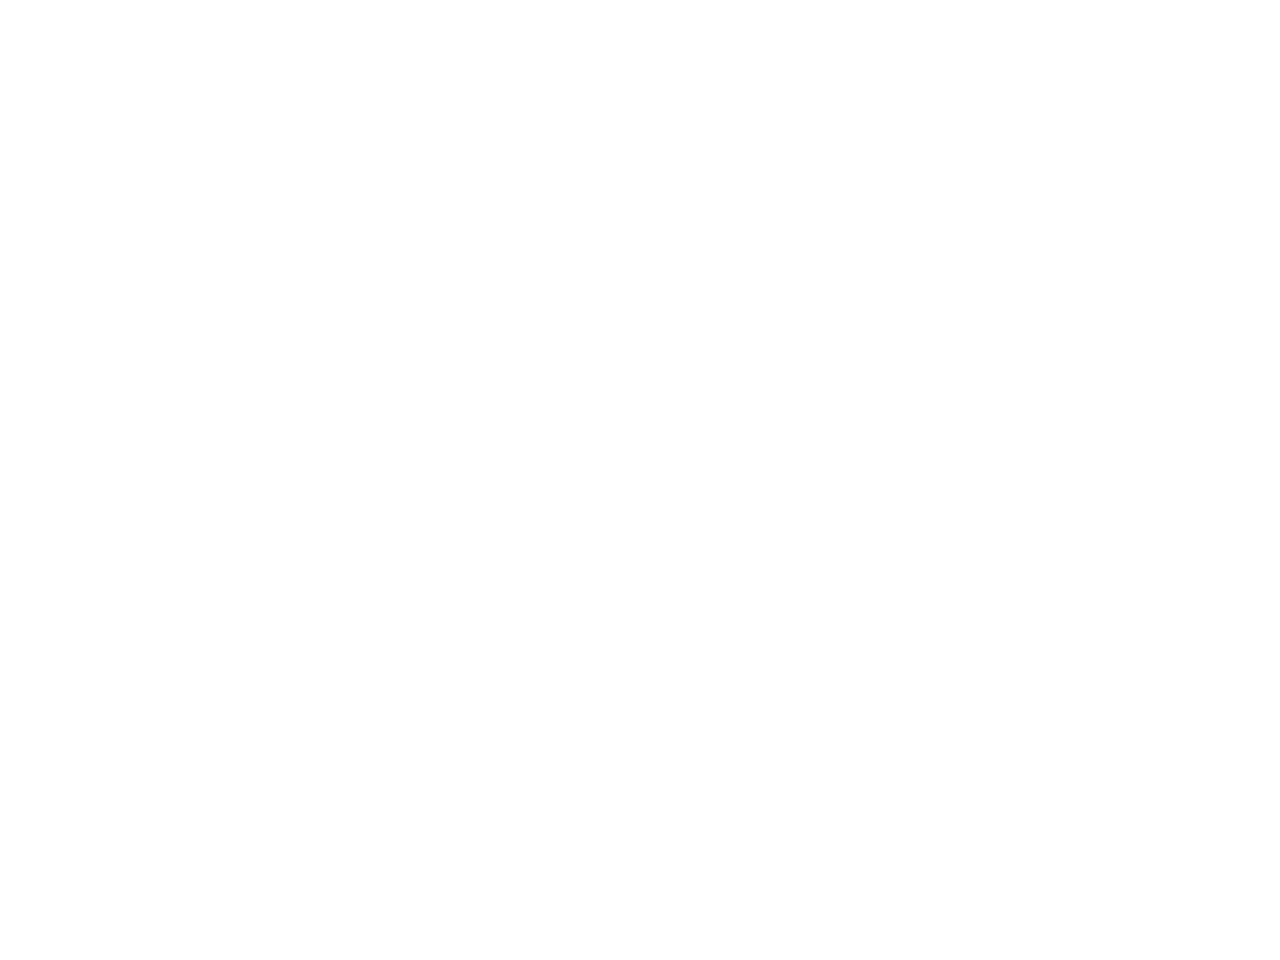

In [146]:
%matplotlib notebook

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(hello_2['x'], hello_2['y'], hello_2['z'])
ax.set_ylim3d([-10, 20]);

## PCA and dimensional reduction demo: PCA transformation

* We will make use of the `decomposition.PCA` function from the `sklearn` package to demonstrate. For now we will keep all PCs:

In [147]:
from sklearn.decomposition import PCA
# create the model
pca = PCA(n_components = 3) 
# fit the model
pca.fit(hello_2)
transformed_hello = pca.fit_transform(hello_2)
transformed_hello.shape

(103, 3)

## PCA and dimensional reduction demo: visualise the transformed data

* Visualise the transformed data:

<IPython.core.display.Javascript object>


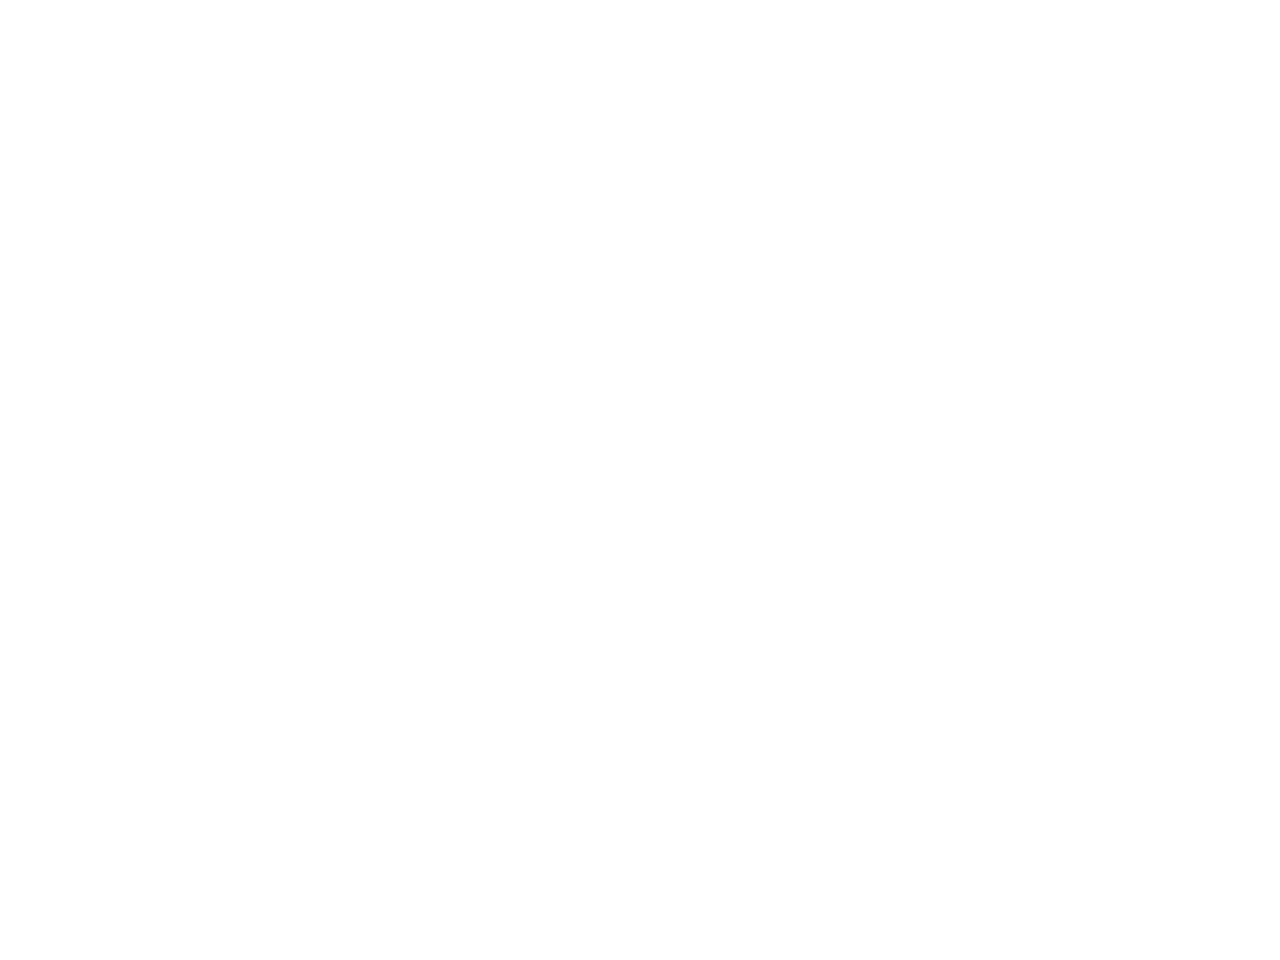

In [148]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(transformed_hello[:,0], transformed_hello[:,1], transformed_hello[:,2])
ax.set_xlim3d([-20, 20]);ax.set_ylim3d([-20, 20]);ax.set_zlim3d([-20, 20]);


## PCA and dimensional reduction demo: variance explained

Most of the data is on the x-y plane (first two PCs). There is hardly any variability along the z axis (last PC):

In [149]:
pca.explained_variance_ratio_

array([9.55749557e-01, 4.39810375e-02, 2.69405073e-04])

## PCA and dimensional reduction demo: visualise the transformed data (2 PCs)

Retain only the first 2 PCs, and visualise it:

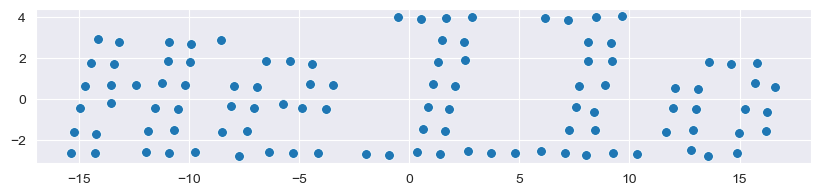

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
pca = PCA(n_components = 2) 
pca.fit(hello)
transformed_hello = pca.fit_transform(hello_2)
fig, ax = plt.subplots(figsize=(10, 2))
sns.scatterplot(x = transformed_hello[:,0], y = transformed_hello[:,1], s = 50);

With the first 2 PCs, we capture most of the variance of the data and also the "meaningful" information of the data.

## PCA and dimensional reduction demo: reconstruction

We can transform data back to its original space with the use of `inverse_transform()`:

In [151]:
recovered_hello = pca.inverse_transform(transformed_hello)
recovered_hello.shape

(103, 3)

## PCA and dimensional reduction demo: reconstruction (continue)

Visualise the reconstructed data:

<IPython.core.display.Javascript object>


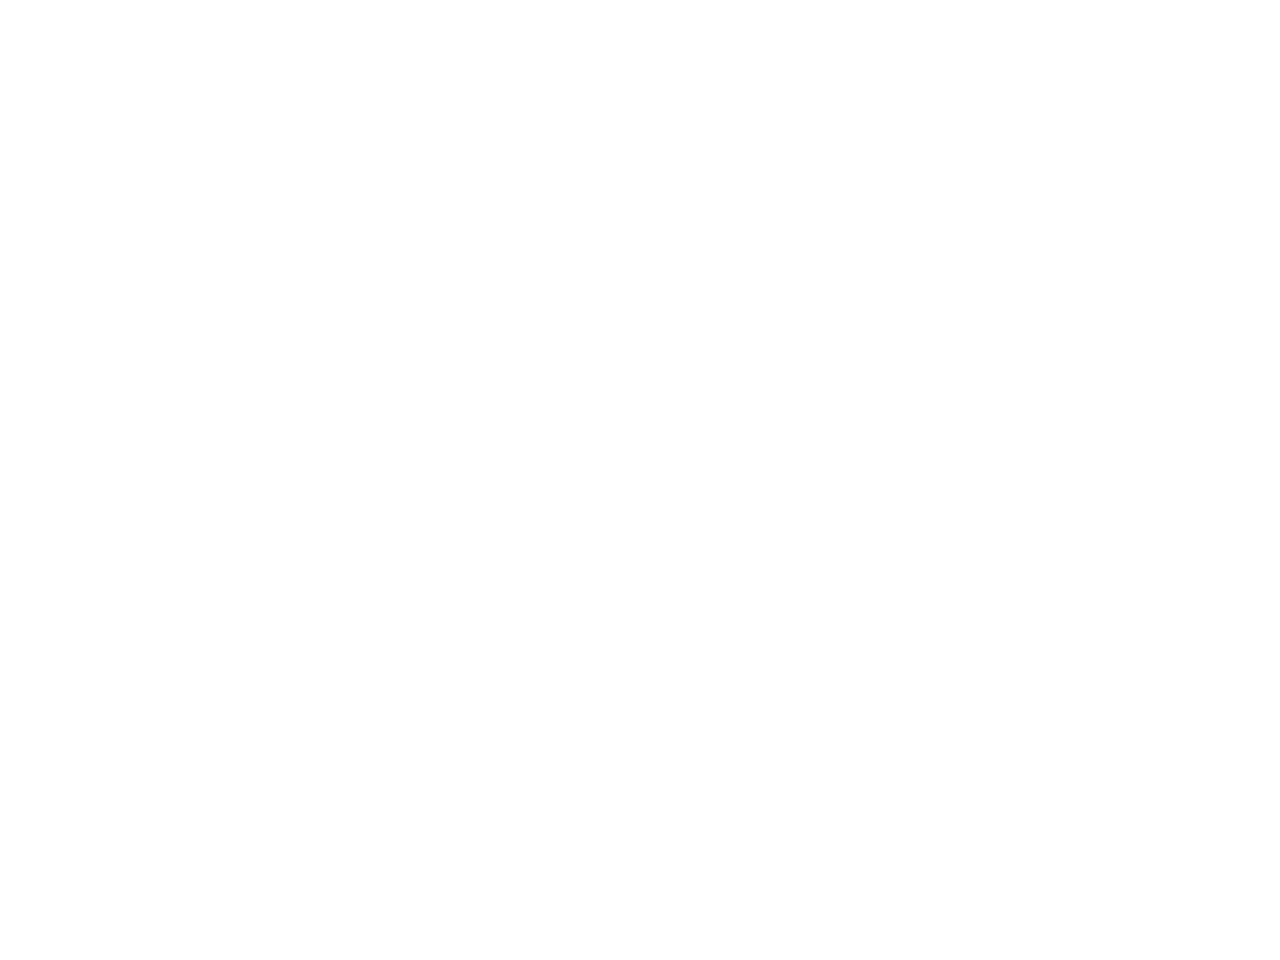

In [152]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure(); ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(recovered_hello[:,0], recovered_hello[:,1], recovered_hello[:,2])
ax.set_ylim3d([-10, 20]);

## PCA: algorithm

1. Measure the variance of data
    * Calculate the sample covariance matrix ($S_x$)
2. Rotate the axes to get the PCs
    * Find the eigenvalues and eigenvectors for $S_x$
    * The eigenvector with the highest eigenvalue is the PC1 ($\phi_1$), the eigenvector with the second highest eigenvalue is PC2 ($\phi_2$), etc
3. Retain the first $q$ PCs $\phi_1,\phi_2,...,\phi_q$
4. Reduce the dimensionality of the data
    * Get the transformed data $Y$ by projecting the original data onto the space defined by the top first $q$ PCs
        * Mathematically: $Y = \Phi^TX$, where $\Phi=(\phi_1,\phi_2,...,\phi_q)$

## PCA: measure of variance

PCA aims to identify a new but smaller set of predictors that captures the maximum amount of _variance_ in the observed data. How can we measure variance of the data?

* Sample variance of $x_i$: $q_{ii} = \frac{\sum_{k = 1}^{n}(x_{i,k}-\bar{x}_i)^2}{n-1}$, where $\bar{x}_i$ is the sample mean
* Sample covariance between two variables $x_i$ and $x_j$: $q_{ij} = \frac{\sum_{k = 1}^{n}(x_{i,k}-\bar{x}_i)(x_{j,k}-\bar{x}_j)}{n-1}$
* Sample covariance between all variables (sample covariance matrix):

$$\begin{pmatrix}
q_{11} & q_{12} & ...& q_{1n}\\
q_{21} & q_{22} & ...& q_{2n}\\
... & ... & ...& ...\\
q_{n1} & q_{n2} & ...& q_{nn}
\end{pmatrix}$$

Note that this matrix is symmetric, as $q_{ij} = q_{ji}$.

## PCA in this course

* We are not going to prove why using eigenvalues and eigenvectors for $S_x$ can help us to get the PCs
    * You will learn it in other courses
    * But for those of you are interested, see [here](https://stats.stackexchange.com/a/140579) to learn more
* In this course, you only need to know:
    * The idea of PCA
    * How you can use it in Python with `decomposition.PCA` function from `sklearn`

Now, we will use an example to show you by doing the above steps, you will get the same (at least very similar) results as using `decomposition.PCA` function from `sklearn`


## PCA: algorithm in Python

Step 1: Find the sample covariance matrix ($S_x$)

In [153]:
X = hello_2.to_numpy().T # need to transpose the data so that each row is an attribute
sample_cov = np.cov(X)
sample_cov

array([[ 77.7687036 ,  -0.66457263, -38.67645526],
       [ -0.66457263,   3.6752332 ,  -1.57578939],
       [-38.67645526,  -1.57578939,  20.2668938 ]])

Step 2: Find the eigenvalues and eigenvectors for $S_x$

In [154]:
eigenvalues, eigenvectors = np.linalg.eigh(sample_cov)
eigenvalues

array([2.74014137e-02, 4.47334786e+00, 9.72100813e+01])

In [155]:
eigenvectors

array([[ 0.40636077,  0.19129795, -0.89346294],
       [ 0.4237288 , -0.90578828, -0.00121849],
       [ 0.80952136,  0.37809084,  0.44913527]])

## PCA: verify the PCs are orthogonal with each other with norm 1


In [156]:
eigenvectors.T@eigenvectors

array([[ 1.00000000e+00, -1.87777929e-16,  4.64208868e-17],
       [-1.87777929e-16,  1.00000000e+00, -9.89794085e-17],
       [ 4.64208868e-17, -9.89794085e-17,  1.00000000e+00]])

## PCA: algorithm in Python (continue)

Step 3: Retain the first 2 PCs (2 eigenvectors corresponding to the highest and second highest eigenvalues)

In [157]:
phi_1 = eigenvectors[:,2]
phi_2 = eigenvectors[:,1]

In [158]:
phi = np.vstack([phi_1, phi_2]).T
phi

array([[-0.89346294,  0.19129795],
       [-0.00121849, -0.90578828],
       [ 0.44913527,  0.37809084]])

Step 4: Transformed data $Y = \Phi^TX$

In [159]:
Y = phi.T@X
Y.T.shape

(103, 2)

## PCA: algorithm in Python (continue)

Use the transformed data for visualisation:

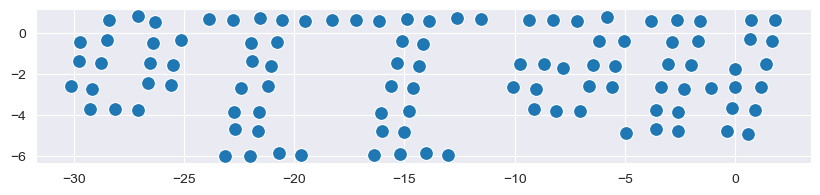

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 2))
sns.scatterplot(x = Y[0], y= Y[1], s = 100);

We get the same result as previously (but rotated).

## PCA application: Handwritten digits dataset

* Here we will work on the handwritten digit dataset provided by `sklearn`
* Before doing that, let us familiarise with the dataset:

In [161]:
from sklearn.datasets import load_digits
digits = load_digits(n_class = 6)['data'] # images of the digits
targets = load_digits(n_class = 6)['target'] # actual digits
digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [162]:
targets

array([0, 1, 2, ..., 4, 4, 0])

## Familarise with the handwritten digits dataset 

In [163]:
digits.shape

(1083, 64)

There are 1083 observations representing images of digits, with each image represented by 64 numbers.
* n = 1083, p = 64

## Familarise with the handwritten digits dataset (continue)

* Have a look of one of the observations:

In [164]:
digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

It is a 1D array with 64 elements, but it is representing an image with size $8\times8$. 
* Reshape the 1D array to 2D array (matrix):

In [165]:
one_digit = digits[0].reshape(8,8)
one_digit

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Each number in the matrix can be considered as the intensity of black colour of the pixel at the corresponding location.

## Familarise with the handwritten digits dataset  (continue)

The observation is indeed representing an image of a handwritten digit:

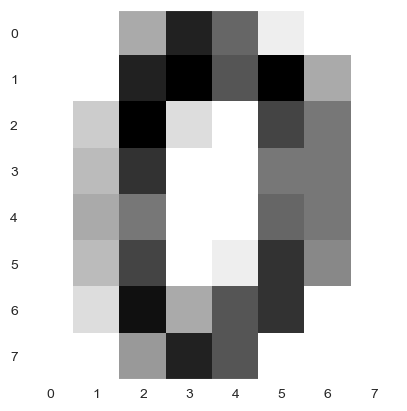

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.imshow(one_digit, cmap = plt.cm.binary)
ax.grid(False);

## Familarise with the handwritten digits dataset  (continue)

Here we visualise more examples:

In [167]:
def plot_digits(X, n_img_per_row, ax = None):
    '''
    to show the given handwritten digits
    '''
    n_img_per_col = X.shape[0]//n_img_per_row
    img = np.zeros((10 * n_img_per_row, 10 * n_img_per_col))
    for i in range(n_img_per_row):
        ix = 10 * i + 1
        for j in range(n_img_per_col):
            iy = 10 * j + 1
            img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
    if ax is None:
        fig, ax = plt.subplots(figsize=(3,3))
    ax.imshow(img, cmap=plt.cm.binary);
    ax.set_xticks([]); ax.set_yticks([]);

## Familarise with the handwritten digits dataset  (continue)

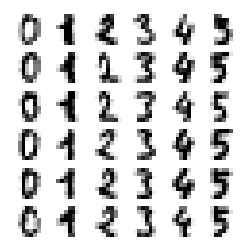

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt

# select 36 digits to show
sample_i = np.array([np.where(targets == i)[0][:6] for i in range(0, 6)]).T.ravel()
plot_digits(digits[sample_i], 6)

## Handwritten digits dataset: dimensionality reduction with PCA

Apply `decomposition.PCA` function from the `sklearn` package:

In [169]:
pca = PCA(n_components=2)
pca.fit(digits)
transformed_digits = pca.fit_transform(digits)

The transformed data is 2-dimensional:

In [170]:
transformed_digits.shape

(1083, 2)

## Handwritten digits dataset: 2D visualisation

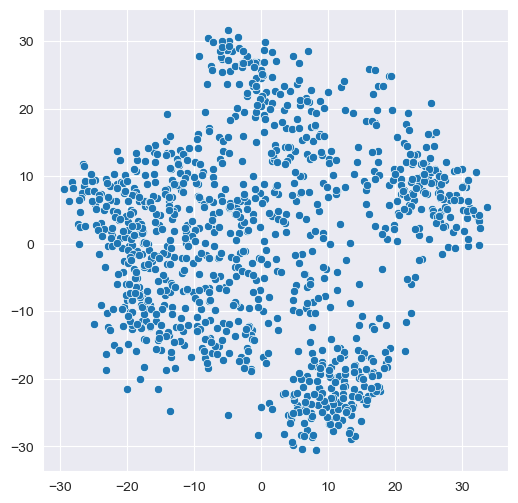

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x = transformed_digits[:,0], y= transformed_digits[:,1]);

... what are we visualising?

## Handwritten digits dataset: 2D visualisation (continue)

Here we have the same scatter plot as the previous slide, but the points are labeled:

In [172]:
def plot_2d_digits(Y, targets):
    '''
    show transformed digits in a 2d scatter plot
    '''
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(Y[:,0].min(),Y[:,0].max())
    ax.set_ylim(Y[:,1].min(),Y[:,1].max())
    for target, y in zip(targets, Y):
        plt.text(y[0], y[1], str(target),color=plt.cm.Set1(target),
             fontdict={'weight': 'bold', 'size': 9})
    plt.show()

## Handwritten digits dataset: 2D visualisation (continue)

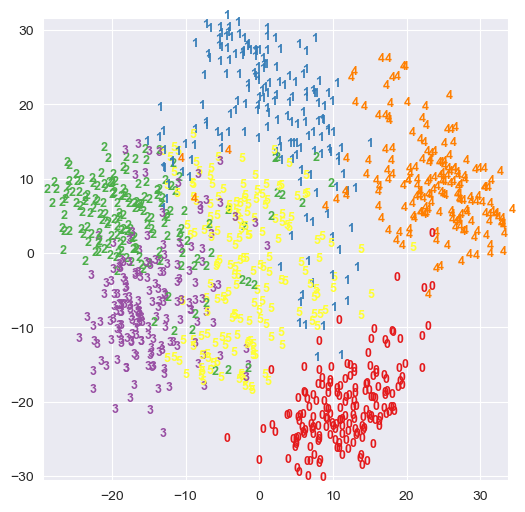

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_2d_digits(transformed_digits, targets)

We can see that observations representing the same digits are "grouped" together.

## Handwritten digits dataset: reconstruction

Let us examine well the low dimensional representation preserving the "significant structure" of the high dimensional data by reconstructing the digits and find out the ratio of variance explained:

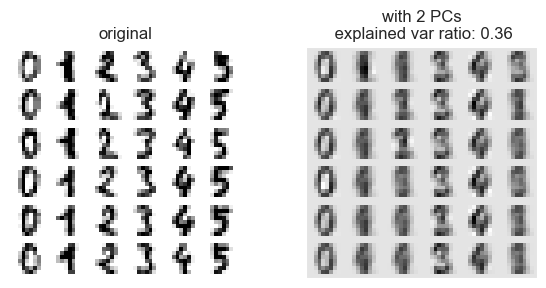

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(7, 3))
recovered_digits = pca.inverse_transform(transformed_digits[sample_i])
plot_digits(digits[sample_i], 6, ax[0])
ax[0].set_title('original')
plot_digits(recovered_digits, 6, ax[1])
ax[1].set_title(f'with 2 PCs\n explained var ratio: {sum(pca.explained_variance_ratio_):.2f}');


What do you think about the result?

## PCA for Handwritten Digits: Retaining different number of components

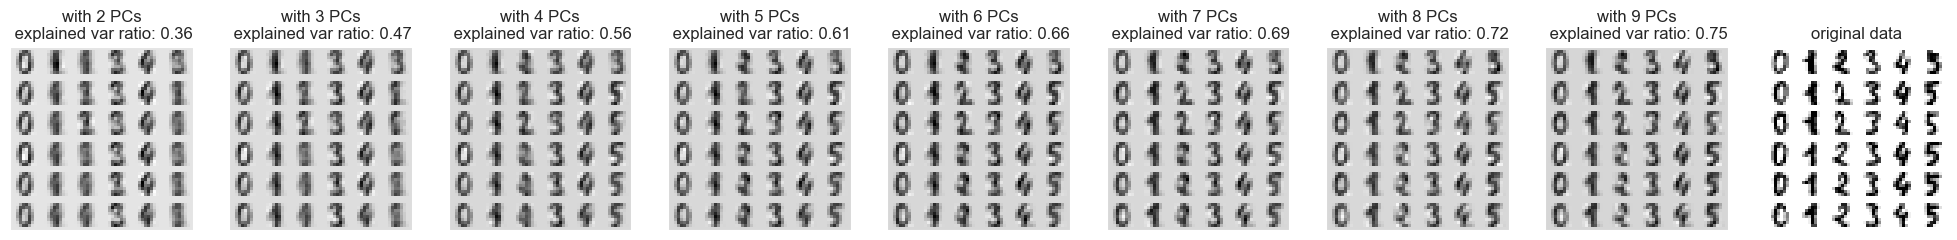

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt

max_pc = 8
fig, ax = plt.subplots(1,max_pc+1, figsize=(25, 5))
plot_digits(digits[sample_i], 6, ax[max_pc])
ax[max_pc].set_title('original data')
for num in range(2, max_pc+2):
    pca = PCA(n_components=num)
    pca.fit(digits)
    transformed_digits = pca.fit_transform(digits)
    recovered_digits = pca.inverse_transform(transformed_digits[sample_i])
    plot_digits(recovered_digits, 6, ax[num-2])
    ax[num-2].set_title(f'with {num} PCs\n explained var ratio: {sum(pca.explained_variance_ratio_):.2f}')

With 8 PCs, we are able to get back most of the "important" features of the digits, even the original data has 64 attributes!

## PCA: What are the PCs?

Let us again consider only 2 PCs:

In [176]:
pca = PCA(n_components=2)
pca.fit(digits)
transformed_digits = pca.fit_transform(digits)

We create some "fake" digits by considering extreme values for the new attributes:

In [177]:
transformed_digits.min(), transformed_digits.max()

(-30.583068703209403, 33.78107572077105)

In [178]:
dummy = [[-33, 33], [ 33, 33], 
         [-33,-33], [ 33,-33]]

## PCA: What are the PCs? (continue)

"Reconstruct" the digits using the dummy data:

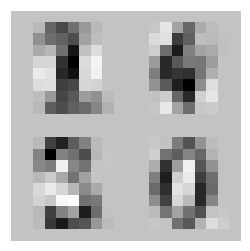

In [179]:
recovered_digits = pca.inverse_transform(dummy)
plot_digits(recovered_digits, 2)

* Top left: Low PC1, High PC2
* Top right: High PC1, High PC2
* Bottom left: Low PC1, Low PC2
* Bottom right: High PC1, Low PC2

This also shows us why we are not able to preserve the information for 5 and 2 well.

## PCA: What are the PCs? (continue)

Here we plot out the weight in each PCs, with darker colour representing higher positive value:

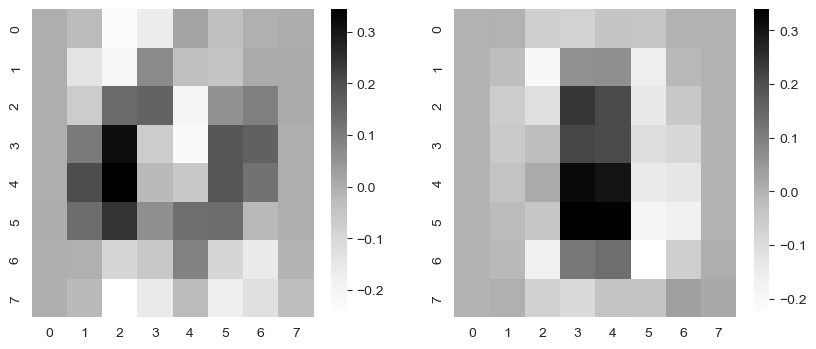

In [180]:
pc1, pc2 = pca.components_
fig, ax = plt.subplots(1,2, figsize = (10, 4))
sns.heatmap(pc1.reshape(8,8), ax = ax[0], cmap="Greys");
sns.heatmap(pc2.reshape(8,8), ax = ax[1], cmap="Greys");

We can see that PC1 has large positive weight for pixels representing the round structure (o) in the middle whereas PC2 has large positive weight for the pixels representing the straight line in the middle (1).

## PCA: What are the PCs? (continue)

Here we plot out the weight in each PCs again, but this time with darker colour representing more negative value:

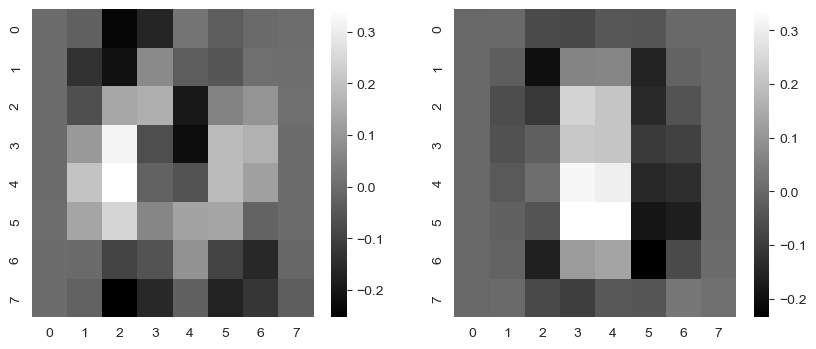

In [181]:
pc1, pc2 = pca.components_
fig, ax = plt.subplots(1,2, figsize = (10, 4))
sns.heatmap(pc1.reshape(8,8), ax = ax[0], cmap="gray");
sns.heatmap(pc2.reshape(8,8), ax = ax[1], cmap="gray");

We can see that PC1 has large negative weight for pixels representing some bits and bots that can help creating the digits like 2 and 3 (and even 1), whereas PC2 has large negative weight for the pixels representing an inverted C, for which can help creating digits like 0 and 3.

## PCA application: Breast cancer data

Transform the data with the use of PCA:

In [182]:
pca = PCA(n_components=2)
cancer_data = cancer_data_df.to_numpy()
pca.fit(cancer_data)
transformed_cancer_data = pca.fit_transform(cancer_data)

In [183]:
transformed_cancer_data.shape

(569, 2)

## PCA application: Breast cancer data (continue)

Visualise the result:

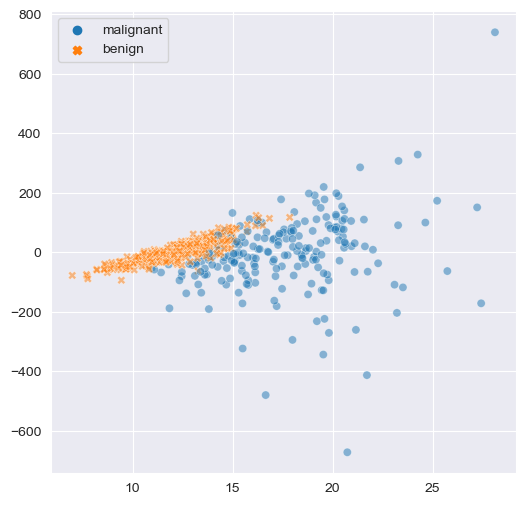

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x = cancer_data[:,0], y = transformed_cancer_data[:,1], 
                hue = cancer_data_df.index, style = cancer_data_df.index, 
                alpha = 0.5);
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['malignant', 'benign']);

## Breast cancer data: why the result is different?

Note the scale of the attributes, and also the variance (or standard deviation) of each attribute are very different:

In [185]:
cancer_data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We should scale the data before applying PCA. We will see how we can do it in the workshop!
* In the workshop, we will also see how we can interpret the PCs

## PCA: remark

* PCA is able to discover true structure of data _if_ the data points are on or near a linear subspace of the high dimensional input space
* PCA finds a low dimensional embedding of the data points that best preserves their variance as measured in the high dimensional input space
* Many datasets contain nonlinear structures that are invisible to PCA

## PCA: an illustration (continue)

How well the first few PCs can retain the variability of the data depending whether the original data. Example:

<img src="figs/pca_bad.png" width="700"/>



## PCA: Hello example with higher noise level

This time we have higher noise level for the hello example:

<IPython.core.display.Javascript object>


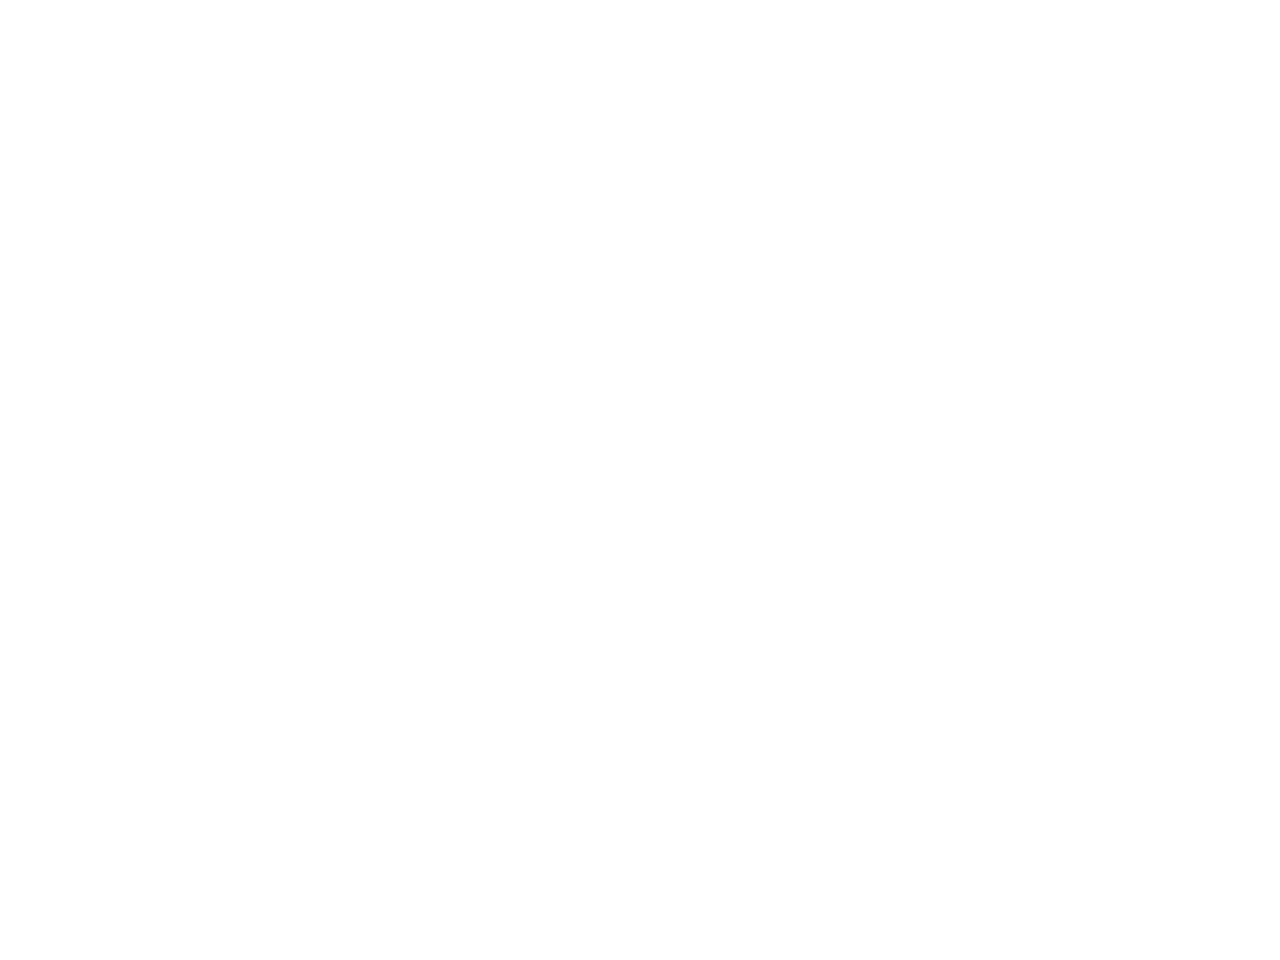

In [186]:
%matplotlib notebook

import matplotlib.pyplot as plt

hello_3 = pd.read_csv('data/hello_3.csv')
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(hello_3['x'], hello_3['y'], hello_3['z'])
ax.set_ylim3d([-10, 20]);

## PCA: Hello example with higher noise level (continue)

Maximize the variability does not necessarily help us to get back the "important" structure:

In [187]:
hello_3 = hello_3.to_numpy()
pca = PCA(n_components=3)
pca.fit(hello_3)
transformed_hello = pca.fit_transform(hello_3)

<IPython.core.display.Javascript object>


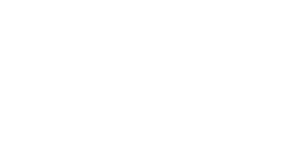

In [188]:
%matplotlib notebook

import matplotlib.pyplot as plt
fig = plt.figure(); ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(transformed_hello[:,0], transformed_hello[:,1], transformed_hello[:,2])
ax.set_xlim3d([-20, 20]); ax.set_ylim3d([-20, 20]); ax.set_zlim3d([-20, 20]);

## PCA: Hello example with higher noise level (continue)

With the first 2 PCs, we are not able to see what the data is representing:

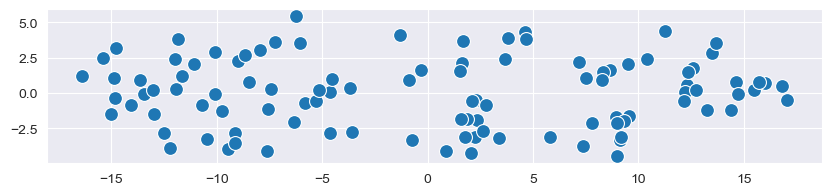

In [189]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 2))
sns.scatterplot(x = transformed_hello[:,0], y = transformed_hello[:,1], s = 100);

## S-shape hello example

Modified example from https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

<IPython.core.display.Javascript object>


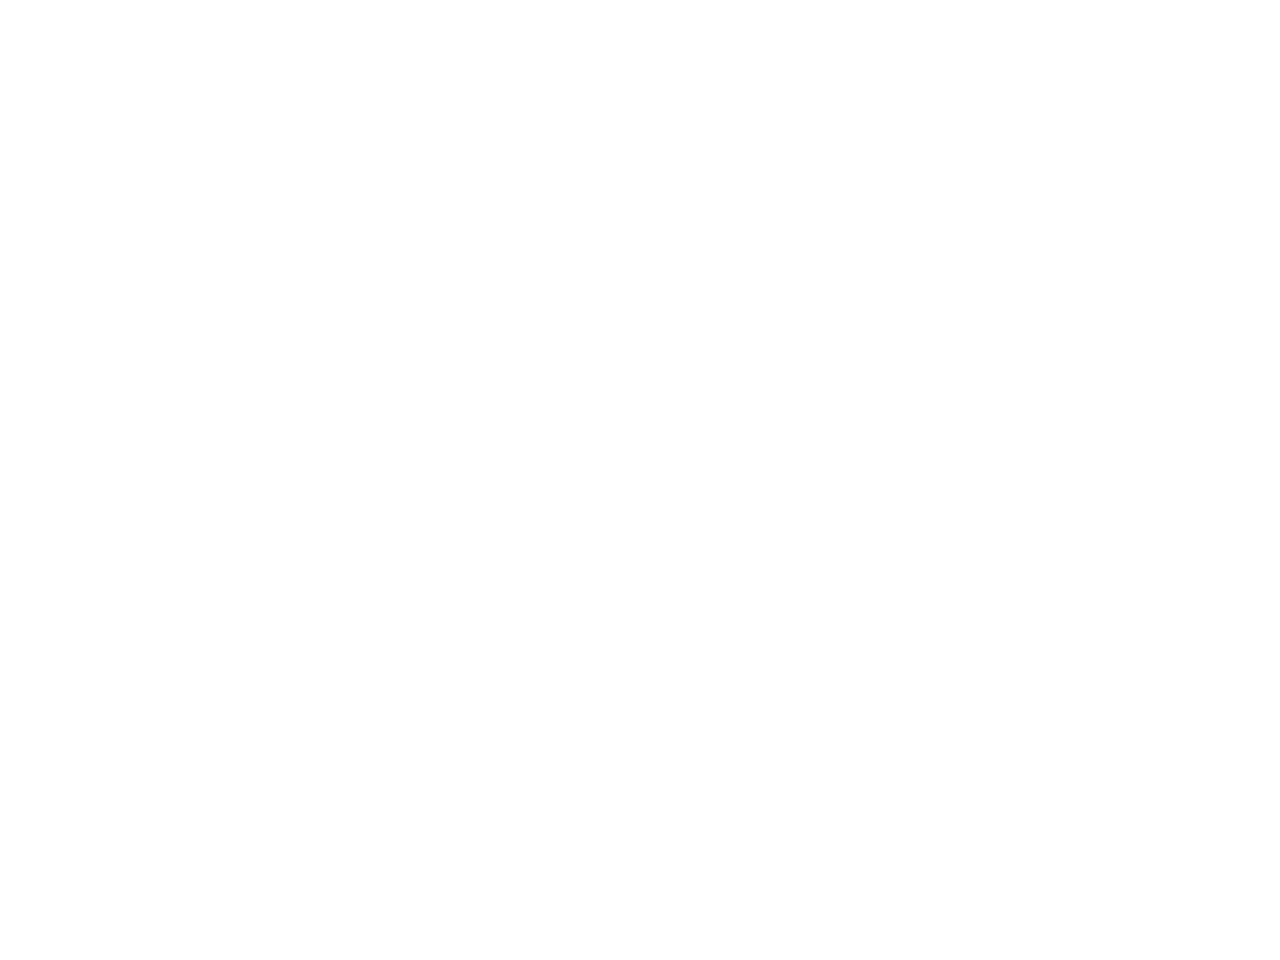

In [190]:
%matplotlib notebook

import matplotlib.pyplot as plt

with open('data/hello_s.npy', 'rb') as f:
    hello_s = np.load(f)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(hello_s[:,0], hello_s[:,1], hello_s[:,2]);

It is like rolling a 2D paper in a 3D space.

## PCA on s-shape hello 

No matter how you rotate the axes, you cannot unfold the s-shape hello. Therefore, PCA does not provide good result:

In [191]:
pca = PCA(n_components=2)
pca.fit(hello_s)
transformed_hello_s = pca.fit_transform(hello_s)

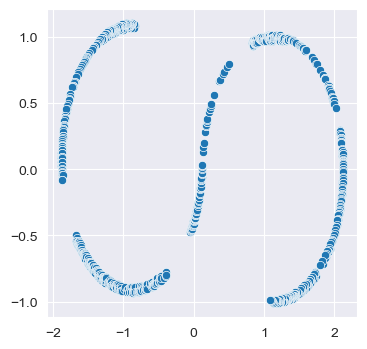

In [192]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x = transformed_hello_s[:,0], y = transformed_hello_s[:,1]);

## Non linear mapping on s-shape hello

On the other hand, if you use some _non linear_ dimensional reduction methods like Locally Linear Embedding, then you can "unfold" the s-shape hello:

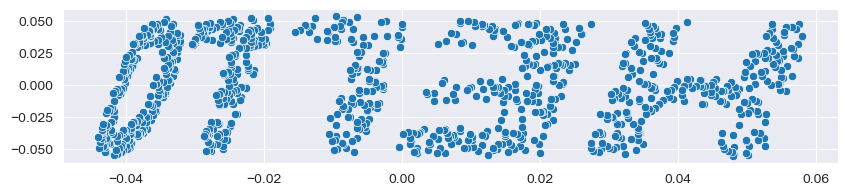

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
transformed_hello_s = model.fit_transform(hello_s)

fig, ax = plt.subplots(figsize=(10, 2))
sns.scatterplot(x = transformed_hello_s[:,0], y = transformed_hello_s[:,1]);

## Note on visualising higher dimensional data in 2D

* Help to visually identifying clusters of observations 
* If the data does not have a good 2D representation, conclusions drawn from the graph may not be valid

## Dimensionality reduction: Applications

* Data visualisation 
* Cluster analysis
* Compression
* Feature selection and extraction
* Reduce the number of attribute $p$ so that we can still apply classical methods (like ordinary least square regression) on the data
* Alleviate the problem of over-fitting

## Related topic: High-dimensional data

High dimensional data is data if $p$ is big relative to $n$.
* Examples:
    * Gene expressions (e.g. n: number of patients, p: number of genes expressions monitored)
    * Documents (n: number of articles, p: number of distinct words available in English)

In this lecture, we only focus data with $p$ is "large" such that we cannot visualise them directly, but $p$ does not necessarily large compare to $n$.

## PCA: Genes mirror geography within Europe

<center><img src="figs/GeneEurope.png" width="600" align="center"/></center>

check our the paper [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2735096/)


# Regular expression

## Regular expression

A _regular expression_ (regex or regexp) is a formula that defines classes of strings.
* It provides an automate way to search and match patterns in text
* Example (find email addresses from some text):

In [194]:
import re

text = '''
The email address of hermione is hermione@gmail.com. 
@Harry - You can contact the Statistics department via statistics@lse.ac.uk.
'''

# r'[\w\.-]+@[\w\.-]+[\w]+' defines a class of strings in the form like xxxx@xxx.xx
re.findall(r'[\w\.-]+@[\w\.-]+[\w]+', text)

['hermione@gmail.com', 'statistics@lse.ac.uk']

`r'[\w\.-]+@[\w\.-]+[\w]+'` above is an example of a regex.

(In reality, checking email address is more complicated. See the discussion [here](https://stackoverflow.com/questions/201323/how-can-i-validate-an-email-address-using-a-regular-expression))

## Note on regular expression

* Regular expression is a big topic. There are books with a few hundred pages for you to learn how to use them. This lecture only serves as an introduction 

<center><img src="figs/regex_book.png" width="600" align="center"/></center>

* Programming languages like C++, Java, Python support regex
    * Behind the scene they may use different regular expression engines and the behaviours can be different. See [here](https://en.wikipedia.org/wiki/Comparison_of_regular_expression_engines) to learn more
    * In this lecture we will use Python

## Literal characters

* The simplest regular expressions are a string of _literal_ characters to match
    * These characters simply match themselves
* Example:

In [195]:
re.findall(r'cat','catch a cat')

['cat', 'cat']

How about the following?

In [196]:
re.findall(r'bababa', 'babababababa')

['bababa', 'bababa']

Note:
* For now, all regex patterns have the `r` prefix, and we will use the `re.findall()` to demonstrate how regex works. We will give more details about what they do later
* The example above shows that regex can match a string in more than one place

## Quantification
Quantification is the notation used to define the number of symbols that could appear in the string. The most common quantifiers are `?`, `*` and `+`.
* `?`: match the previous expression _zero_ or _one_ time. Example:

In [197]:
re.findall(r'colou?r','colour color colouuur')

['colour', 'color']

* `*`: match the previous expression _any_ times (including zero). Example:

In [198]:
re.findall(r'congrats!*','congrats. congrats! congrats!!!!')

['congrats', 'congrats!', 'congrats!!!!']

* `+`: match the previous expression _at least one_ time

In [199]:
re.findall(r'go+al','gal goal goooal goooooooooal')

['goal', 'goooal', 'goooooooooal']

## Quantification (continue)

* `{n}`: match the previous expression exactly _n_ times

In [200]:
re.findall(r'go{3}al','gal goal goooal goooooooooal')

['goooal']

* `{n, m}`: match the previous expression at least `n` times but not more than `m` times. Both `n` and `m` can be omitted

In [201]:
re.findall(r'go{1,5}al','gal goal goooal goooooooooal')

['goal', 'goooal']

In [202]:
re.findall(r'go{1,}al','gal goal goooal goooooooooal')

['goal', 'goooal', 'goooooooooal']

`? * + { }` are some examples of _special metacharacters_.

## Special  metacharacters

Special metacharacters are reserved symbols used to assist in matching.
* They do not match themselves. For example:

In [203]:
re.findall(r'colou?r','colour color colou?r')

['colour', 'color']

We will see later how we can treat special metacharacters as normal literal characters later.

* Complete list of metacharacters:
```
. ^ $ * + ? { } [ ] \ | ( )
```

## Character classes

Character class is a specific set of characters that you wish to match.
* `[]` is used to define a character class
* Characters can be listed individually, or a range of characters can be indicated by giving two characters and separating them by a `-`
* Examples:

In [204]:
# match gray or grey
# useful to match American or British English, note [ae] and [ea] give the same result
re.findall(r'gr[ae]y','gray grey graey gry')

['gray', 'grey']

In [205]:
# [a-e] is equivalent to [abcde]
re.findall(r'gr[a-e]y','gray grby grey grafy')

['gray', 'grby', 'grey']

## Character class: note

* Metacharacters are _not_ active inside classes. Example:

In [206]:
# match gray or gr+y
re.findall(r'gr[a+]y','gray graay gr+y')

['gray', 'gr+y']

* `-` has special meaning in a character class _only_ if it is used within a range. Example:

In [207]:
# match gray, grey or gr-y
re.findall(r'gr[-ae]y','gray grey gr-y grby')

['gray', 'grey', 'gr-y']

## Character class: some more examples

* Match only lowercase letters: `[a-z]`. Example:

In [208]:
re.findall(r'c[a-z]t', 'cat cot cAt c2t')

['cat', 'cot']

* Match only digits: `[0-9]` (which is equivalent to `[0123456789]`). Example:

In [209]:
re.findall(r'c[0-9]t', 'cat cot cAt c2t')

['c2t']

* Match only English letters: `[a-zA-Z]`. Example:

In [210]:
re.findall(r'c[a-zA-Z]t', 'cat cot cAt coAt c2t')

['cat', 'cot', 'cAt']

Note last example shows that you can have multiple range in a character class.

## Negated character classes

You can match the characters _not_ listed within the class by complementing the set
* This is indicated by including a `^` as the _first_ character of the class. Examples:

In [211]:
# match any character except space ' '
re.findall(r'c[^ ]t', 'cat c t cAt c2t c^t')

['cat', 'cAt', 'c2t', 'c^t']

In [212]:
# match any character except a digit or uppercase letters
re.findall(r'c[^0-9A-Z]t', 'cat c t cAt c2t c^t')

['cat', 'c t', 'c^t']

* If the caret appears elsewhere in a character class, it does not have special meaning. For example:

In [213]:
# match either a digit or '^'
re.findall(r'c[0-9^]t', 'cat c t cAt c2t c^t')

['c2t', 'c^t']

## Predefined character classes

* Some special sequences beginning with `'\'` represent predefined sets of characters that are often useful
* Examples:
     * `\w`: any alphanumeric character
         * For a Unicode aware regex engine, this matches Unicode word characters, including most characters that can be part of a word in any language
     * `\d`: any decimal digit, equivalent to the class `[0-9]`
     * `\s`: any whitespace character, equivalent to the class `[ \t\n\r\f\v]`
     * `\W`, `\D` and `\S`: negated character classes of `\w`, `\d` and `\s`
     * `.`: any character

## Predefined character sets: examples

* Get all hash tags from a [LSE tweet](https://twitter.com/LSEnews/status/1489252089817538562) with the following content:

In [214]:
text = '''Office, remote or hybrid? What's the future?

Listen to the experts on our new episode of #LSEIQ #podcast with @LSEManagement's @connsonlocke & #CarstenSorensen

🍎 Apple podcasts: https://apple.co/3eACh6O
☁️ Soundcloud: https://bit.ly/3njmk9h
💻 YouTube: https://bit.ly/3FhJiDR'''

In [215]:
re.findall(r'#\w+', text)

['#LSEIQ', '#podcast', '#CarstenSorensen']

* Get all links from the tweet above:

In [216]:
re.findall(r'https?://\S+', text)

['https://apple.co/3eACh6O',
 'https://bit.ly/3njmk9h',
 'https://bit.ly/3FhJiDR']

## Backslash

* Backslash is used to allow special metacharacters to be used without invoking their special meaning
    * Compare the regex with and without the backslash:

In [217]:
re.findall(r'[0-9]*[0-9]', 'Calculate 2*3. How about 2+3?')

['2', '3', '2', '3']

In [218]:
re.findall(r'[0-9]\*[0-9]', 'Calculate 2*3. How about 2+3?')

['2*3']

* In the previous slide we have also seen that backslash is used to signal various special sequences like `\w`, `\d`, etc
    * Compare the regex with and without the backslash:

In [219]:
re.findall(r'd\*d', 'Calculate 2*3. How about 2+3?') # match d*d

[]

In [220]:
re.findall(r'\d\*\d', 'Calculate 2*3. How about 2+3?') # match digit*digit

['2*3']

## Anchors

Anchors `^` and `$` are used to match at the beginning and the end of a line. Examples:

In [221]:
re.findall(r'^\w+', 'data science') 

['data']

In [222]:
re.findall(r'\w+$', 'data science') 

['science']

## Anchors (continue)

`\b` is used to signify the word boundary (i.e. boundary between a `\w` and a `\W` character). Compare the following:

In [223]:
re.findall(r'cat\w*', 'catch cat application copycat')  # words contain cat

['catch', 'cat', 'cation', 'cat']

In [224]:
re.findall(r'\bcat\w*', 'catch cat application copycat') # words start with cat

['catch', 'cat']

In [225]:
re.findall(r'\w*cat', 'catch cat application copycat') # words contain cat

['cat', 'cat', 'applicat', 'copycat']

In [226]:
re.findall(r'\w*cat\b', 'catch cat application copycat') # words end with cat

['cat', 'copycat']

## Alternation

The metacharacter `|` is used as the "or" operator in regex.
* If `A` and `B` are regular expressions, `A|B` will match any string that matches either `A` or `B`
* `|` has very low precedence in order to make it work reasonably when you’re alternating multi-character strings
* Examples:

In [227]:
re.findall(r'[a-z]+|[A-Z]+', 'cat Cat CAT')

['cat', 'C', 'at', 'CAT']

## Grouping and capturing

Metacharacters `()` are used for grouping and capturing.
* `()` group the expressions contained inside them together. This allows you to repeat the contents of a group with a repeating qualifier, or to restrict alternation to part of the regex
* Examples:

In [228]:
re.findall(r'da(ta)*','da data datatatata dataaaa')

['', 'ta', 'ta', 'ta']

In [229]:
re.findall(r'gr(a|e)y','gray grey gr|y')

['a', 'e']

Note with `re.findall()`, only contents within the `()` will be kept (as `()` _captures_ the match). 

## Grouping and capturing (continue)

Instead you may want to use `()` on the whole regex. Example:

In [230]:
re.findall(r'(gr(a|e)y)','gray grey gr|y')

[('gray', 'a'), ('grey', 'e')]

Alternatively, you can use other regex functions like `re.search()` in Python.

## More practice on regex

Try your regex on https://regex101.com

<center><img src="figs/regex_101.png" width="700" align="center"/></center>

# Python and regex

## `re` module

The `re` module in Python provides regular expression matching operations for searching, matching and replacing text.
* Basic methods:
    * `re.search()`: Search throughout a string to see if there exists a pattern match
    * `re.match()`: Search from the beginning of a string to see if there exists a pattern match
    * `re.sub()`: Replace the leftmost non-overlapping occurrences of pattern in string by a given string
    * `re.findall()`: Return all the matched occurrences of the given regex
    * `re.compile()`: Store a pattern that needs to be extracted from any given sentence often
    

## `re` demo:  `re.search()`

`re.search()` retuns a `re.Match` object if there is a match:

In [231]:
m = re.search(r'\b20(2(1))(\d{5})\b', 'The student id of Hermione is 202124680. The student id of Ginny is 202101010.')
type(m)

re.Match

In [232]:
print(m.group(0))

202124680


Note only the first match is provided. `group(0)` is the whole match. Other groups are from left to right, outer to inner:

In [233]:
print(m.group(1, 2, 3))

('21', '1', '24680')


`re.search()` returns `None` if there is no match:

In [234]:
m = re.search(r'\b2021\d{5}\b', 'the email address of Hermione is hermione@lse.ac.uk')
print(m)

None


## `re` demo:  `re.match()`

`re.match()` is similar to `re.search()`, but the match must start from the beginning of the string. 

* Examples:

In [235]:
m = re.match(r'\b2021\d{5}\b', 'The student id of Hermione is 202124680. The student id of Ginny is 202101010.')
print(m)

None


In [236]:
m = re.match(r'\b2021\d{5}\b', '202124680 is the student id of Hermione.')
m.group(0)

'202124680'

## `re` demo:  `re.sub()`

`re.sub()` replaces the leftmost non-overlapping occurrences of pattern in string by a given string.

* Examples:

In [237]:
# replace 9-digit student id by XXXXXXXXXX
re.sub(r'\b2021\d{5}\b', 'X'*9, 'The student id of Hermione is 202124680. The student id of Ginny is 202101010.')

'The student id of Hermione is XXXXXXXXX. The student id of Ginny is XXXXXXXXX.'

In [238]:
# no match, return the string with the same content
re.sub(r'\b2021\d{5}\b', 'X'*9, 'The email address of Hermione is hermione@lse.ac.uk')

'The email address of Hermione is hermione@lse.ac.uk'

## `re` demo: `re.compile()`

You can use `re.compile()` to define a pattern for repeated use. Example:

In [239]:
# words start with "cat" (not include cat), case insensitive
pattern = re.compile(r'\bcat\S+', re.IGNORECASE) 
pattern.findall('Categorical cat')

['Categorical']

In [240]:
# reuse
pattern.findall('complicated application catering CATELOG')

['catering', 'CATELOG']

Another benefit is to separate definition of the regex from its use.

## Note on backslash in Python

In Python, backslash is also used as an escape character, which is a character that invokes an alternative interpretation on the following characters in a character sequence. Examples:

In [241]:
# backslash in \n signify \n should be interpreted newline instead of n
print('a\nb')

a
b


In [242]:
# backslash in \' signify ' should be as literal character instead of treated as string quotation
print('5\'10"')

5'10"


This means that we need to use `'\\'` to represent one literal backslash character like the following:

In [243]:
# first backslash is an escape character, signify the next backslash should be treated as 
# a normal character rather than an escape character
print('a\\nb')

a\nb


Otherwise the next character will be interpreted as a special meaning. 

## Raw strong notation

Python provides the _raw string notation_ (string prefixed with `r`), for which backslashes are not handled in any special way. Example:

In [244]:
print(r'\n') 

\n


`r'\n'` contains 2 characters `'\'` and `'n'`, whereas `'\n'` is a one-character string containing a newline.

## Raw strong notation and regex in Python

With raw string notation, matching text in Python with `\` is much easier. For example:

In [245]:
re.findall(r'\\[a-zA-Z]+', '\\Section') 

['\\Section']

Rather than:

In [246]:
re.findall(r'\\\\[a-zA-Z]+', '\\Section') 

[]

As to match a literal backslash, one has to write `'\\\\'` as the regex string, because the regular expression must be `\\`, and each backslash must be expressed as `\\` inside a regular Python string literal.

## Summary

* Visualise higher dimensional data with the use of PCA
* Regular expression



## Preview of workshop

* Applying different dimensionality reduction methods to visualise data

## Further readings
* Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. Ch 8 about PCA (till PCA on compression)
* [Manifold learning](http://scikit-learn.org/stable/modules/manifold.html)